## Network SIR model with pair approximation

In [1]:
library(deSolve)
library(simecol)
library(reshape2)

In [2]:
sir_pa_ode <- new("odeModel",
  main = function(time, init, parms, ...){
    with(as.list(c(init,parms)),{
      # Closure
      SSI <- (k-1)*SS*SI/(k*S)
      ISS <- (k-1)*SI*SS/(k*S)
      ISI <- (k-1)*SI*SI/(k*S)
      # ODEs
      dS <- -beta*SI
      dI <- beta*SI-gamma*I
      dSS <- -beta*(SSI+ISS)
      dSI <- beta*(SSI-ISI)-beta*SI-gamma*SI
      dII <- beta*(2*ISI)+2*beta*SI-2*gamma*II
      list(c(dS,dI,dSS,dSI,dII))
    })},
  parms = c(beta=3,gamma=1.0,k=5),
  times = c(from=0,to=20,by=0.01),
  init = c(S=0.999,I=0.001,SS=0.999*0.999,SI=0.999*0.001,II=0.001*0.001),
  solver = "lsoda"
)

In [3]:
sir_pa_ode <- sim(sir_pa_ode)

In [4]:
sir_pa_out <- out(sir_pa_ode)
sir_pa_out_long <- melt(as.data.frame(sir_pa_out),"time")

### Visualisation

In [5]:
library(ggplot2)

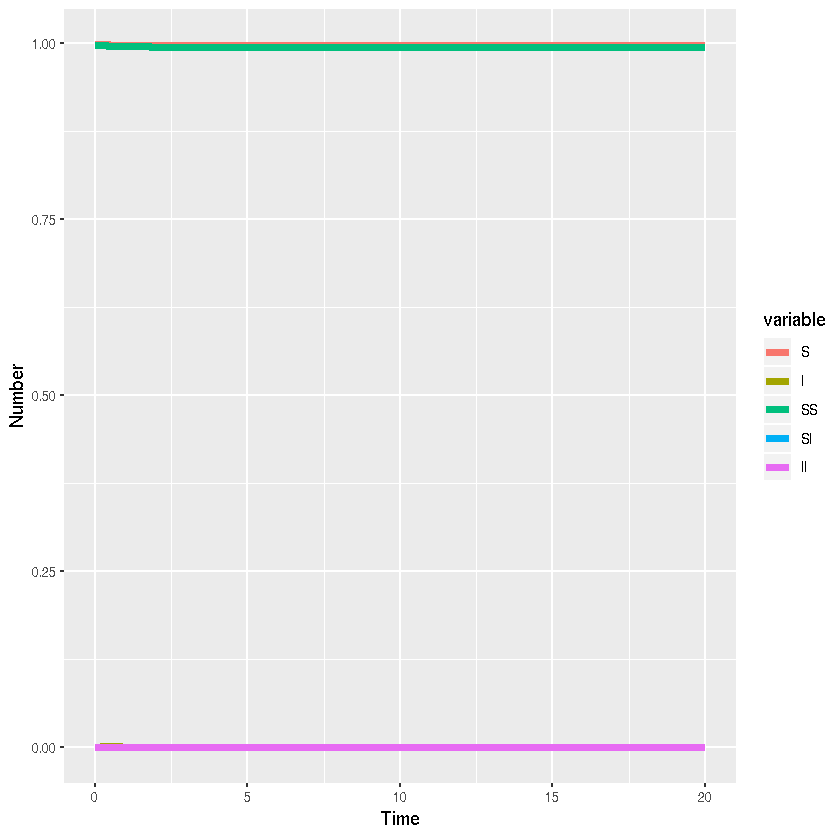

In [6]:
ggplot(sir_pa_out_long,aes(x=time,y=value,colour=variable,group=variable))+
  # Add line
  geom_line(lwd=2)+
  #Add labels
  xlab("Time")+ylab("Number")